<a href="https://colab.research.google.com/github/nandujkishor/15cse401-project/blob/main/Stock_prediction_15cse401_project_tcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install pmdarima

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from fbprophet import Prophet
import pmdarima as pmd

# Stock Prediction using Machine Learning techniques
## Dataset - Nifty50 SBIN

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/nandujkishor/15cse401-project/main/dataset/TCS.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,2020-10-26,TCS,EQ,2686.80,2689.95,2709.95,2670.50,2690.10,2688.20,2694.09,2672766,7.200674e+14,101255.0,908018,0.3397
4013,2020-10-27,TCS,EQ,2688.20,2699.75,2718.15,2624.10,2634.80,2630.15,2654.79,3537594,9.391582e+14,172659.0,1597439,0.4516
4014,2020-10-28,TCS,EQ,2630.15,2650.00,2655.95,2606.00,2619.50,2622.20,2625.65,3569515,9.372292e+14,143177.0,1548301,0.4338
4015,2020-10-29,TCS,EQ,2622.20,2608.00,2655.00,2600.25,2632.10,2632.65,2634.88,3105970,8.183860e+14,121416.0,1069258,0.3443


In [28]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4.017000e+03,4.017000e+03,2334.000000,4.017000e+03,4017.000000
mean,1654.268832,1655.894436,1675.809584,1634.295096,1654.623961,1654.720625,1654.942611,1.625300e+06,2.733769e+14,81917.364182,8.759937e+05,0.552254
std,695.689885,695.549913,700.671056,690.829349,695.814973,695.756743,695.791771,1.586694e+06,3.619128e+14,53682.242895,8.623773e+05,0.133035
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,1095.150000,1098.000000,1111.000000,1080.300000,1095.000000,1095.800000,1095.370000,7.798740e+05,1.034208e+14,45359.250000,4.265490e+05,0.461500
50%,1511.750000,1512.000000,1527.500000,1492.450000,1512.000000,1511.950000,1510.170000,1.197439e+06,1.772639e+14,66222.500000,6.871540e+05,0.557200
75%,2261.100000,2265.000000,2289.000000,2241.450000,2262.000000,2263.200000,2265.000000,1.982176e+06,3.179303e+14,103302.000000,1.087847e+06,0.649100
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4017 non-null   object 
 1   Symbol              4017 non-null   object 
 2   Series              4017 non-null   object 
 3   Prev Close          4017 non-null   float64
 4   Open                4017 non-null   float64
 5   High                4017 non-null   float64
 6   Low                 4017 non-null   float64
 7   Last                4017 non-null   float64
 8   Close               4017 non-null   float64
 9   VWAP                4017 non-null   float64
 10  Volume              4017 non-null   int64  
 11  Turnover            4017 non-null   float64
 12  Trades              2334 non-null   float64
 13  Deliverable Volume  4017 non-null   int64  
 14  %Deliverble         4017 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 470.9

Date is used as the index for the dataframe. As part of cleaning, incomplete and unnecessary columns - series, symbol, trades, deliverable volume and deliverable - are dropped. 

In [30]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.set_index("Date", drop=False, inplace=True)
df.drop(["Series","Symbol","Trades","Deliverable Volume","%Deliverble"], axis=1, inplace=True)
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,
2004-08-25,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15
2004-08-26,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14
2004-08-27,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14
2004-08-30,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14
2004-08-31,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,2020-10-26,2686.80,2689.95,2709.95,2670.50,2690.10,2688.20,2694.09,2672766,7.200674e+14
2020-10-27,2020-10-27,2688.20,2699.75,2718.15,2624.10,2634.80,2630.15,2654.79,3537594,9.391582e+14
2020-10-28,2020-10-28,2630.15,2650.00,2655.95,2606.00,2619.50,2622.20,2625.65,3569515,9.372292e+14


In [31]:
100 * df.isnull().sum() / len(df)

Date          0.0
Prev Close    0.0
Open          0.0
High          0.0
Low           0.0
Last          0.0
Close         0.0
VWAP          0.0
Volume        0.0
Turnover      0.0
dtype: float64

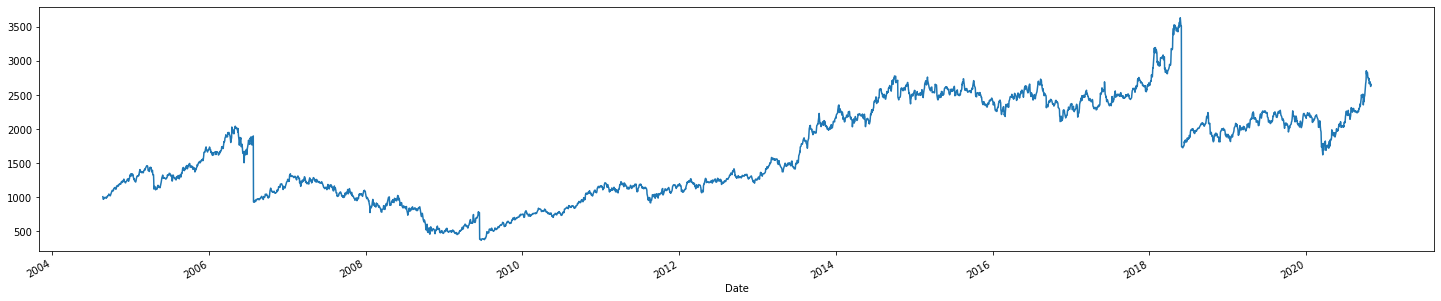

In [32]:
df.VWAP.plot(figsize=(25, 5))
plt.show()

A kernel density estimate plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. Represents the data using a continuous probability density curve in one or more dimensions.

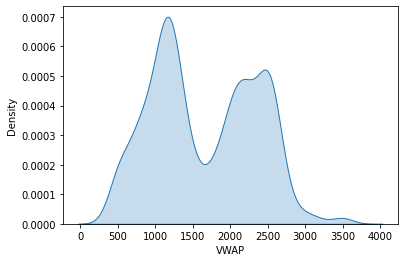

In [33]:
sns.kdeplot(df.VWAP, shade=True)
plt.show()

In [34]:
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.isocalendar().day
df["day_of_week"] = df.Date.dt.dayofweek
df.drop(['Date'], axis=1, inplace=True)
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,,,
2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,8,35,3,2
2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,8,35,4,3
2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,8,35,5,4
2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,8,36,1,0
2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,8,36,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,2686.80,2689.95,2709.95,2670.50,2690.10,2688.20,2694.09,2672766,7.200674e+14,10,44,1,0
2020-10-27,2688.20,2699.75,2718.15,2624.10,2634.80,2630.15,2654.79,3537594,9.391582e+14,10,44,2,1
2020-10-28,2630.15,2650.00,2655.95,2606.00,2619.50,2622.20,2625.65,3569515,9.372292e+14,10,44,3,2


In [35]:
y = df['Close']
df.drop(['VWAP', 'Close'], axis=1, inplace=True)
df

,Prev Close,Open,High,Low,Last,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,
2004-08-25,850.00,1198.70,1198.70,979.00,985.00,17116372,1.725876e+15,8,35,3,2
2004-08-26,987.95,992.00,997.00,975.30,976.85,5055400,4.982865e+14,8,35,4,3
2004-08-27,979.00,982.40,982.40,958.55,961.20,3830750,3.715586e+14,8,35,5,4
2004-08-30,962.65,969.90,990.00,965.00,986.40,3058151,3.005106e+14,8,36,1,0
2004-08-31,986.75,986.50,990.00,976.00,987.80,2649332,2.602133e+14,8,36,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,2686.80,2689.95,2709.95,2670.50,2690.10,2672766,7.200674e+14,10,44,1,0
2020-10-27,2688.20,2699.75,2718.15,2624.10,2634.80,3537594,9.391582e+14,10,44,2,1
2020-10-28,2630.15,2650.00,2655.95,2606.00,2619.50,3569515,9.372292e+14,10,44,3,2


In [36]:
indx = df.index
cols = df.columns
(indx, cols)

(DatetimeIndex(['2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
                '2004-08-31', '2004-09-01', '2004-09-02', '2004-09-03',
                '2004-09-06', '2004-09-07',
                ...
                '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
                '2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28',
                '2020-10-29', '2020-10-30'],
               dtype='datetime64[ns]', name='Date', length=4017, freq=None),
 Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Volume', 'Turnover',
        'month', 'week', 'day', 'day_of_week'],
       dtype='object'))

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df)
X = pd.DataFrame(data, index=indx, columns=cols)
X

,Prev Close,Open,High,Low,Last,Volume,Turnover,month,week,day,day_of_week
Date,,,,,,,,,,,
2004-08-25,0.149318,0.256876,0.248995,0.193184,0.190845,0.388457,0.135978,0.636364,0.653846,0.333333,0.333333
2004-08-26,0.191934,0.193568,0.187819,0.192033,0.188333,0.114439,0.039182,0.636364,0.653846,0.500000,0.500000
2004-08-27,0.189169,0.190628,0.183391,0.186822,0.183510,0.086616,0.029189,0.636364,0.653846,0.666667,0.666667
2004-08-30,0.184118,0.186799,0.185696,0.188829,0.191276,0.069063,0.023587,0.636364,0.673077,0.000000,0.000000
2004-08-31,0.191563,0.191884,0.185696,0.192251,0.191707,0.059774,0.020410,0.636364,0.673077,0.166667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,0.716748,0.713614,0.707360,0.719385,0.716291,0.060307,0.056670,0.818182,0.826923,0.000000,0.000000
2020-10-27,0.717181,0.716616,0.709847,0.704951,0.699250,0.079955,0.073945,0.818182,0.826923,0.166667,0.166667
2020-10-28,0.699248,0.701378,0.690981,0.699320,0.694535,0.080680,0.073793,0.818182,0.826923,0.333333,0.333333


RMSE is considered as the evaluation metric

In [38]:
def get_rmse(y_test, y_pred): return np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))

# k-Nearest Neighbours algorithm

In [39]:
def get_val(x_train, test_r, y_test, n_neighbors):
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distances([test_r], [x_train[i]])[0][0]
        distances.append((i, dist))
    distances.sort(key=lambda tup: tup[1])
    v = 0
    for i in range(n_neighbors):
        v += y_test[distances[i][0]]
    return v/n_neighbors

### Train and test without k-Fold

In [40]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]

In [41]:
y_pred = []
for i in X_test.values:
    y_pred.append(get_val(X_train.values, i, y_train, 2))
y_pred

[2526.9,
 2484.775,
 2497.55,
 2517.825,
 2516.3,
 2526.9,
 2484.775,
 2515.375,
 2478.0,
 2503.3500000000004,
 2484.775,
 2471.45,
 2494.075,
 2538.9750000000004,
 2525.0,
 2511.05,
 2494.075,
 2538.9750000000004,
 2493.075,
 2477.3999999999996,
 2533.4,
 2538.45,
 2510.9750000000004,
 2426.9750000000004,
 2442.75,
 2472.8,
 2538.45,
 2512.175,
 2550.05,
 2526.45,
 2533.4,
 2551.3500000000004,
 2543.95,
 2541.5,
 2562.9,
 2551.625,
 2551.3500000000004,
 2537.2,
 2477.8500000000004,
 2509.1000000000004,
 2414.45,
 2402.675,
 2390.725,
 2394.95,
 2398.2250000000004,
 2419.7,
 2419.275,
 2490.925,
 2512.975,
 2583.4,
 2564.575,
 2528.925,
 2529.55,
 2639.2,
 2564.575,
 2528.925,
 2529.55,
 2526.7749999999996,
 2572.5,
 2564.575,
 2615.1499999999996,
 2595.625,
 2596.95,
 2589.6499999999996,
 2604.325,
 2610.925,
 2613.4,
 2620.875,
 2632.575,
 2624.0249999999996,
 2610.925,
 2613.4,
 2620.875,
 2632.575,
 2638.0,
 2610.925,
 2613.4,
 2629.375,
 2632.575,
 2638.0,
 2610.925,
 2600.525,
 2

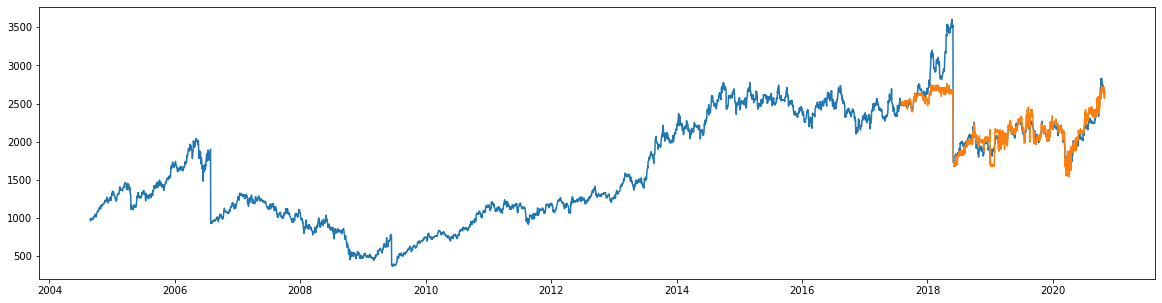

RMS value - 197.7501070756074


In [42]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred)
plt.show()
rmse_knn_fl = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print("RMS value -", rmse_knn_fl)

### Train and test with 10 folds (Folds created using TimeSeriesSplit)

In [43]:
ts = TimeSeriesSplit(n_splits=10)

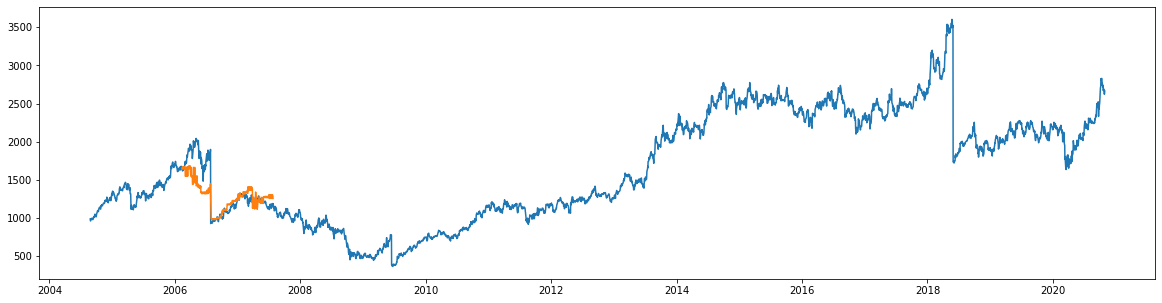

RMSE value - 219.52548154196788


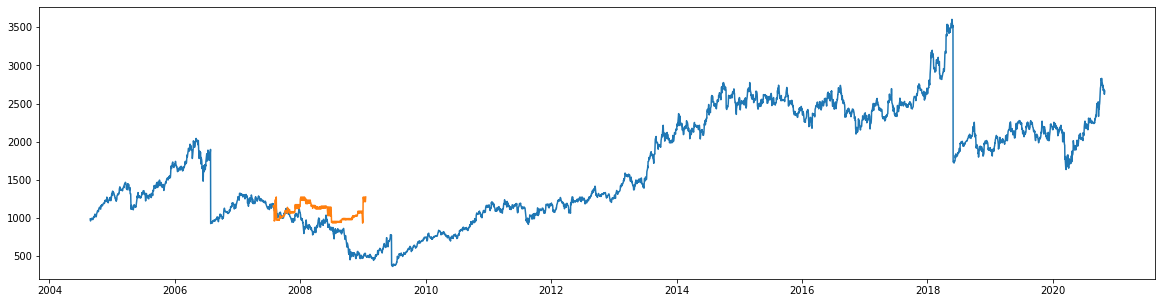

RMSE value - 299.5203684929011


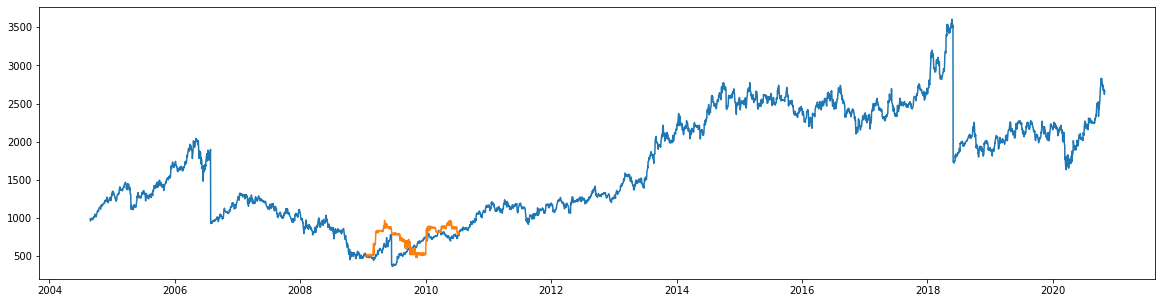

RMSE value - 185.56098155323497


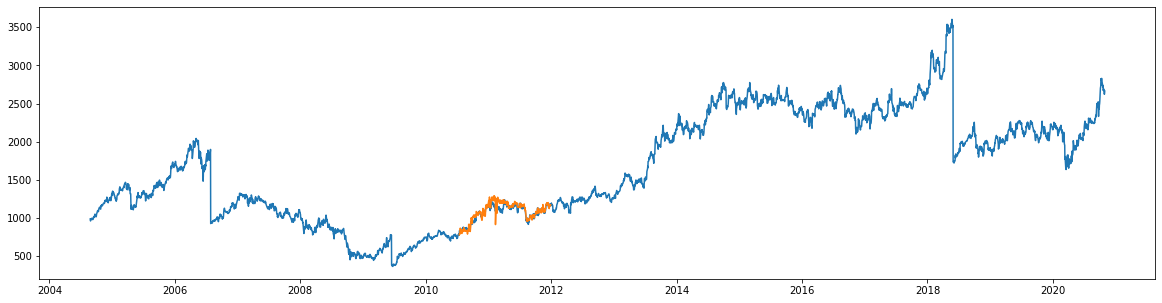

RMSE value - 51.39800661411014


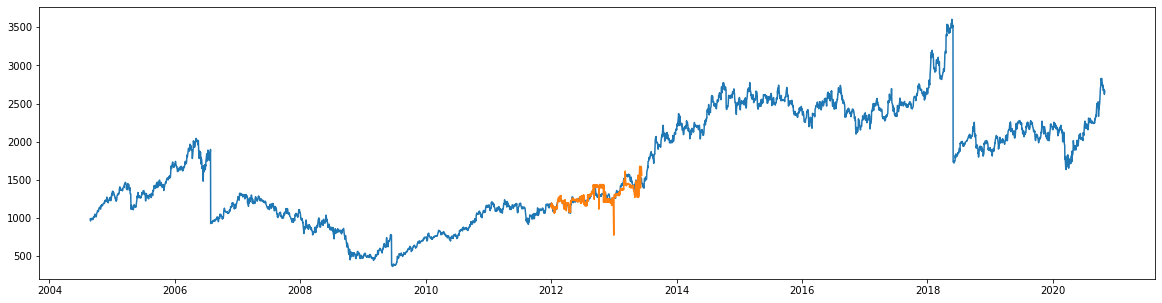

RMSE value - 72.59574756876943


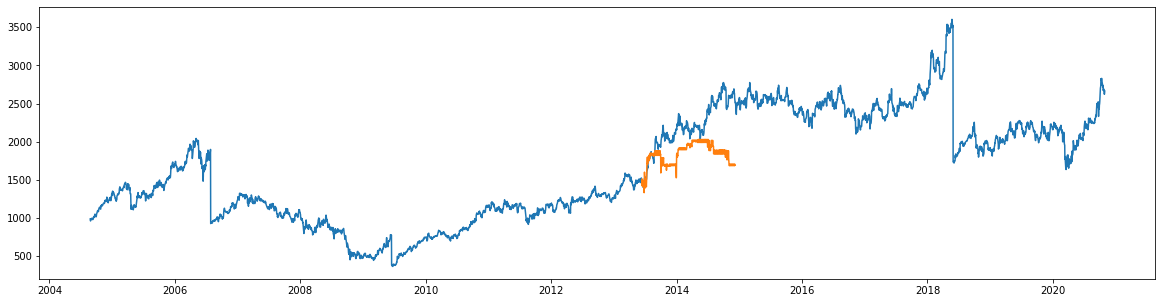

RMSE value - 449.82954591917286


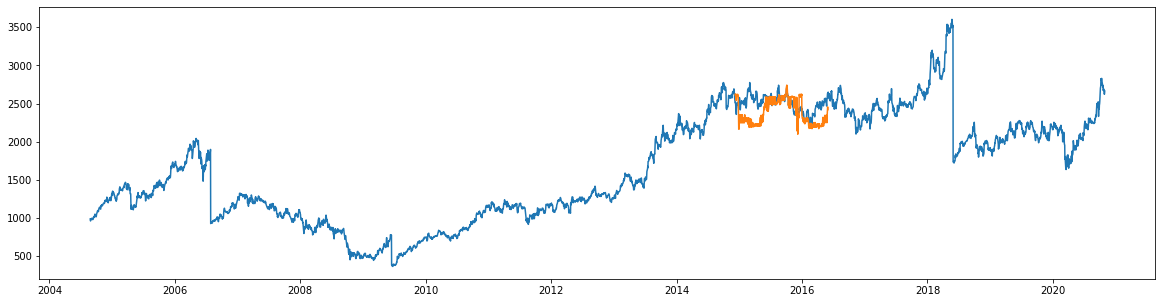

RMSE value - 198.2547141340398


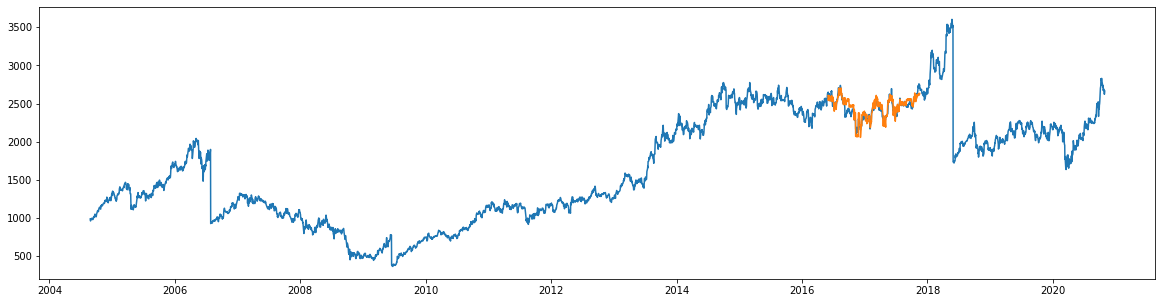

RMSE value - 61.22961830302594


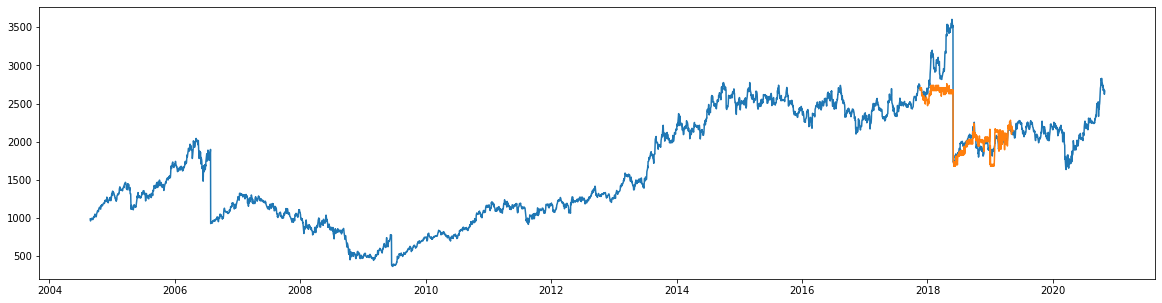

RMSE value - 279.8904490862917


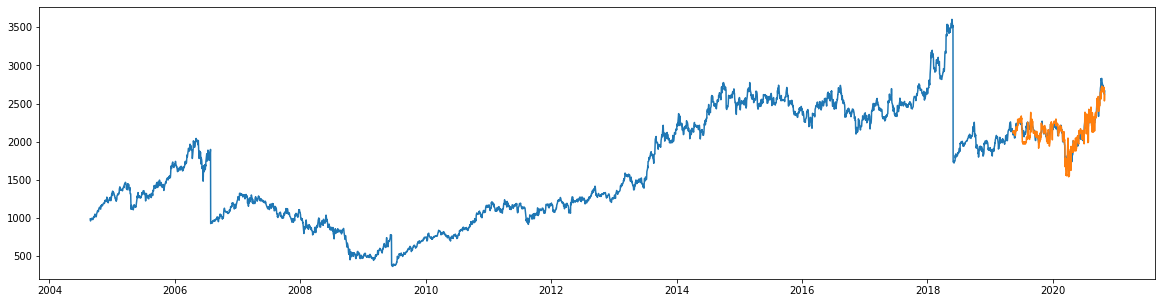

RMSE value - 81.38717546689679


In [44]:
y_preds = []
rmses = []
for train_index,test_index in ts.split(X):
    X_train,X_test = X.values[train_index],X.values[test_index]
    y_train,y_test = y.values[train_index],y.values[test_index]
    y_pred = []
    for row in X_test:
        y_pred.append(get_val(X_train, row, y_train, 2))
    plt.figure(figsize=(20, 5))
    plt.plot(indx, y.values)
    plt.plot(indx[test_index], y_pred)
    plt.show()
    rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
    rmses.append(rmse)
    print("RMSE value -", rmse)

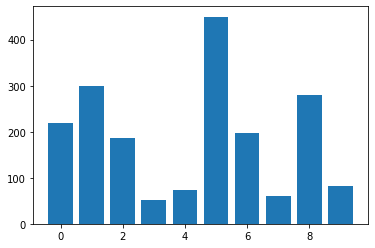

189.91920886804104


In [45]:
plt.bar(range(10), rmses)
plt.show()
rmse_knn_avg = np.mean(rmses)
print(rmse_knn_avg)

In [46]:
fn_ts = TimeSeriesSplit(n_splits=10)

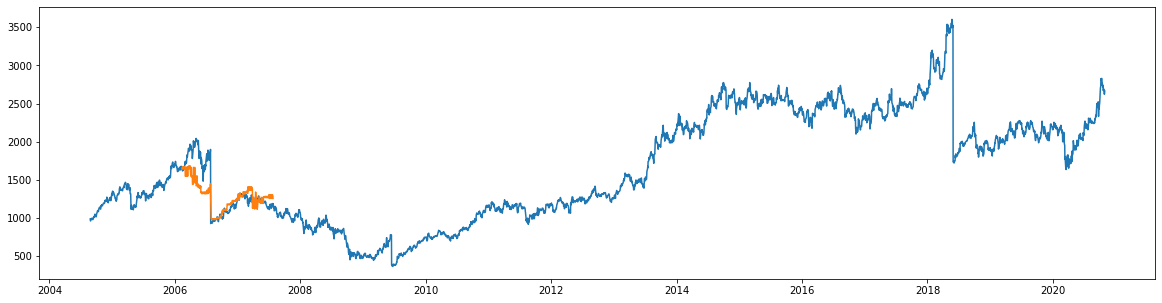

RMSE -  219.52548154196788


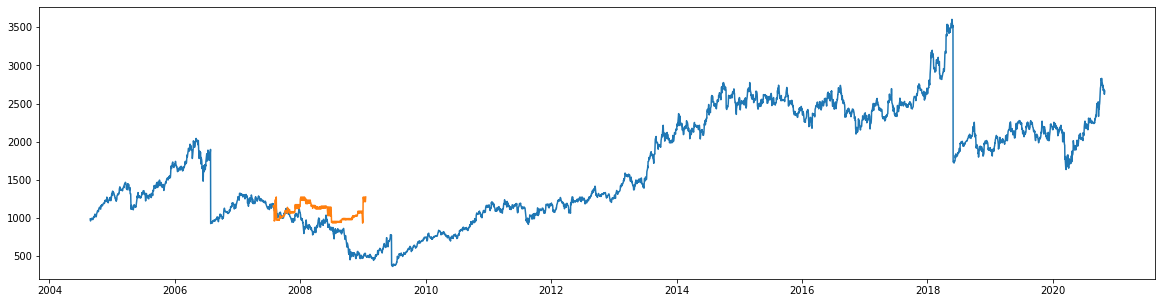

RMSE -  299.5203684929011


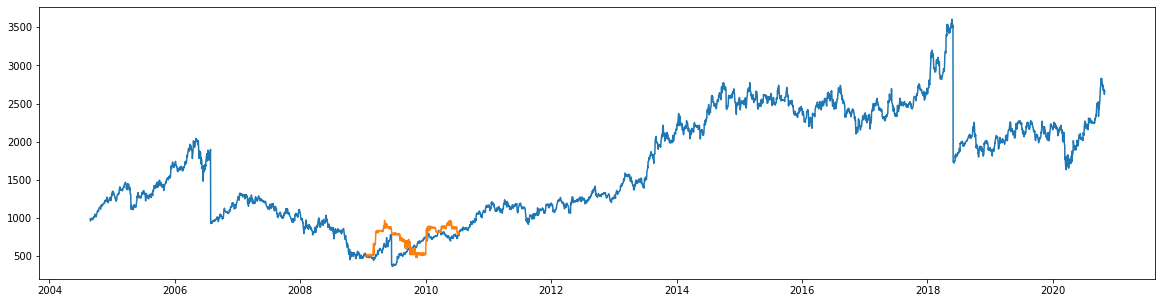

RMSE -  185.56098155323497


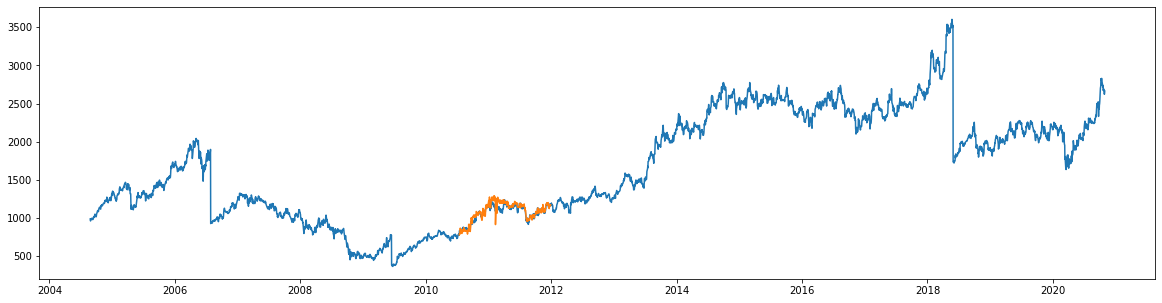

RMSE -  51.39800661411014


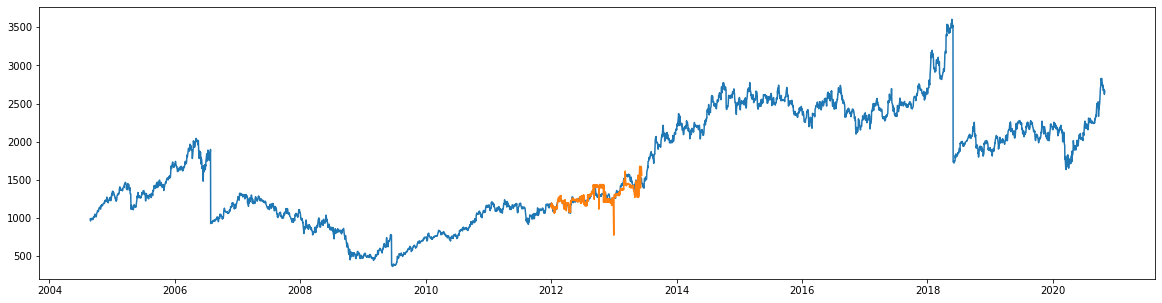

RMSE -  72.59574756876943


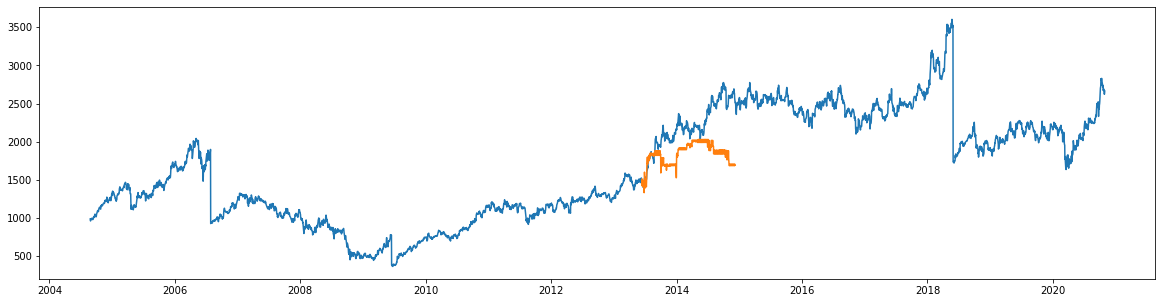

RMSE -  449.82954591917286


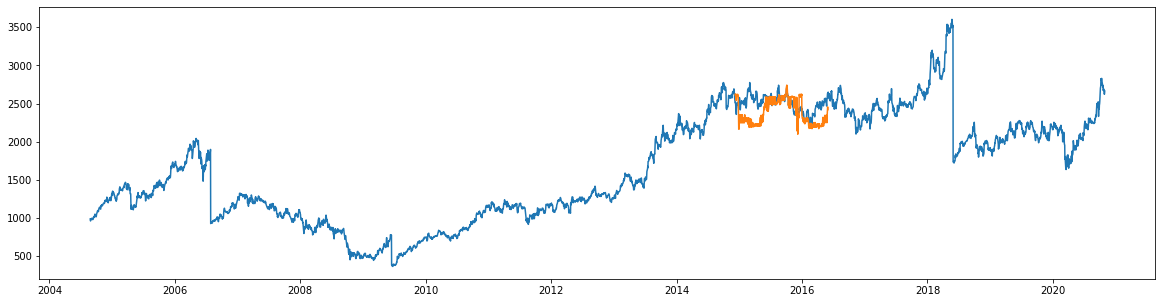

RMSE -  198.2547141340398


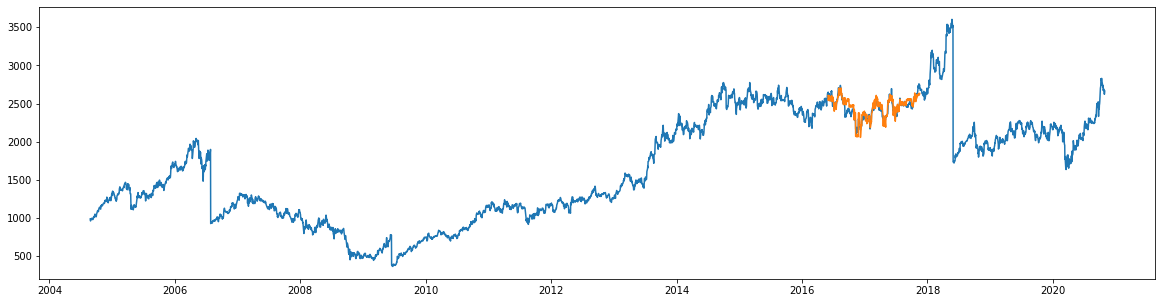

RMSE -  61.22961830302594


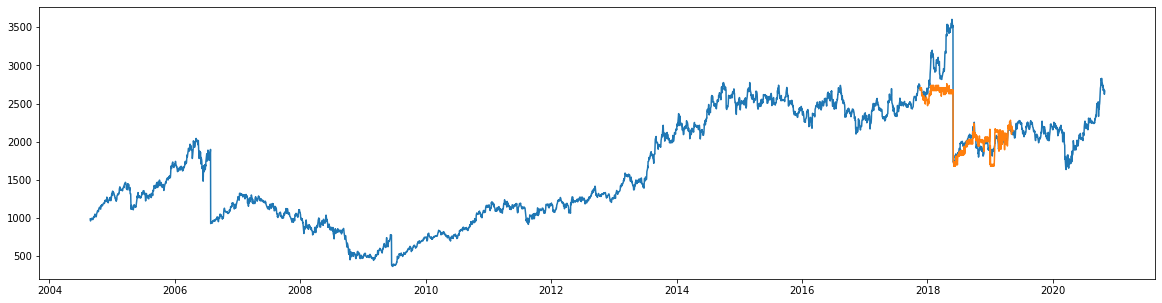

RMSE -  279.8904490862917


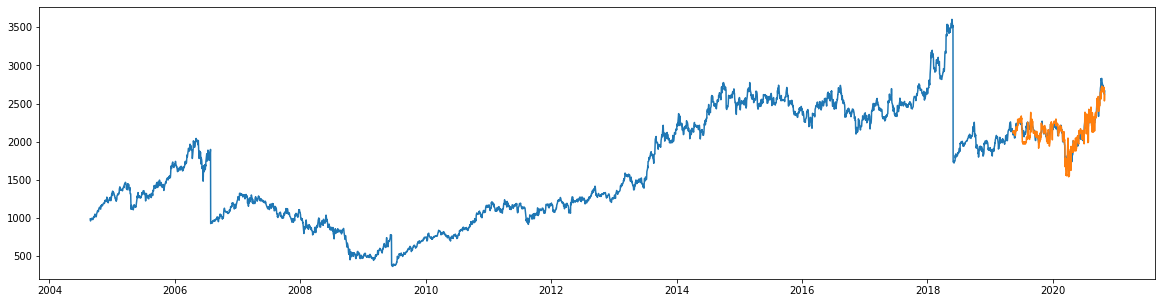

RMSE -  81.38717546689679


In [47]:
fn_y_preds = []
fn_rmses = []
knn = KNeighborsRegressor(n_neighbors=2)
for train_index,test_index in fn_ts.split(X):
    X_train,X_test = X.values[train_index],X.values[test_index]
    y_train,y_test = y.values[train_index],y.values[test_index]
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    fn_y_preds.append(y_pred)
    plt.figure(figsize=(20, 5))
    plt.plot(indx, y.values)
    plt.plot(indx[test_index], y_pred)
    plt.show()
    rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
    fn_rmses.append(rmse)
    print("RMSE - ", rmse)

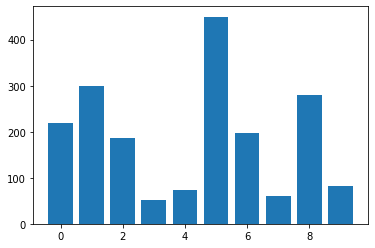

189.91920886804104


In [48]:
plt.bar(range(10), fn_rmses)
plt.show()
print(np.mean(fn_rmses))

# Linear Regression with Principal Component Analysis

In [53]:
X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]

In [55]:
pca = PCA(n_components=2)
X_p = pca.fit_transform(df)
X_p

array([[ 1.45249922e+15,  9.85845300e+06],
       [ 2.24909601e+14,  2.55792792e+06],
       [ 9.81817269e+13,  1.82471359e+06],
       ...,
       [ 6.63852362e+14, -6.30125053e+05],
       [ 5.45009127e+14, -6.32810627e+05],
       [ 6.36464647e+14, -6.66430881e+05]])

In [56]:
X_p = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_p)
X_p

array([[0.13597796, 0.81529932],
       [0.03918204, 0.43315465],
       [0.0291895 , 0.39477468],
       ...,
       [0.07379285, 0.2662766 ],
       [0.06442201, 0.26613602],
       [0.07163332, 0.26437618]])

In [57]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_lr = model.predict(X_test)
y_pred_lr

array([2475.60919349, 2489.6150785 , 2523.884215  , 2505.52185155,
       2501.97977624, 2508.9421909 , 2517.54714645, 2495.55847794,
       2469.62288936, 2493.31324905, 2484.36391607, 2516.45510706,
       2515.16754091, 2501.77583666, 2491.53076726, 2498.9631666 ,
       2488.60331632, 2475.65283744, 2483.41522432, 2496.38192653,
       2460.86186137, 2455.84195468, 2481.99557276, 2454.08698975,
       2460.28896846, 2465.67962433, 2456.37404018, 2494.48142827,
       2494.4169039 , 2485.29178059, 2503.72846078, 2504.89668464,
       2497.786021  , 2494.6625192 , 2524.08352192, 2508.49395661,
       2511.38381246, 2477.05543909, 2494.97815975, 2473.22829799,
       2438.15811325, 2450.50379616, 2441.17380144, 2430.25644847,
       2450.54512136, 2450.59909726, 2454.80002695, 2499.51244635,
       2545.5002486 , 2561.39253418, 2586.02480655, 2595.48542127,
       2592.81203924, 2583.1447    , 2589.80286267, 2576.26849454,
       2563.71771989, 2533.67832142, 2578.91395155, 2613.97796

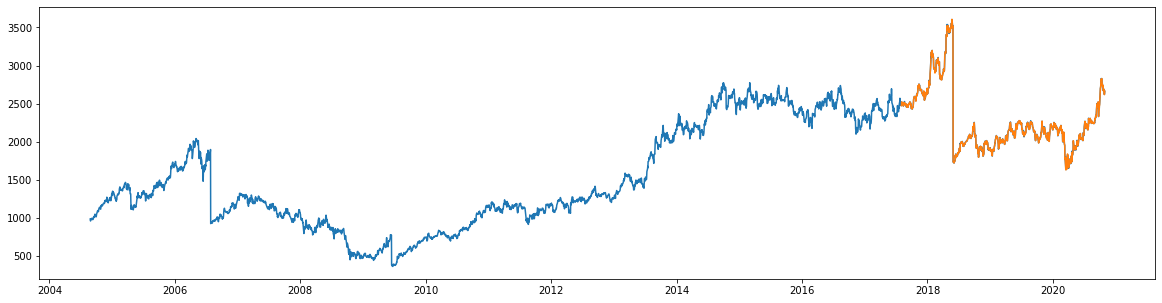

RMSE value -  4.769109504880742


In [58]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred_lr)
plt.show()
rmse_lr_fl = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred_lr)),2)))
print("RMSE value - ", rmse_lr_fl)

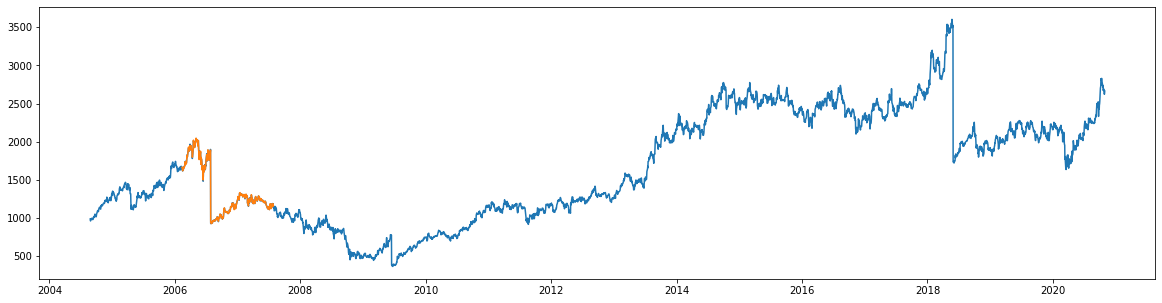

RMSE value - 4.8147654653588985


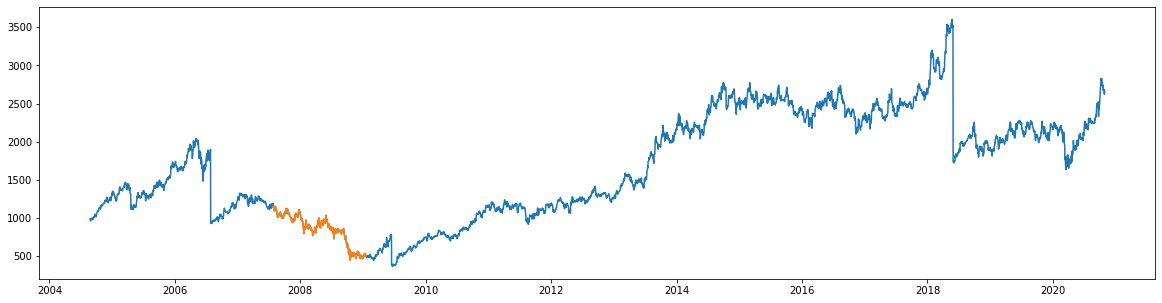

RMSE value - 4.541122715416138


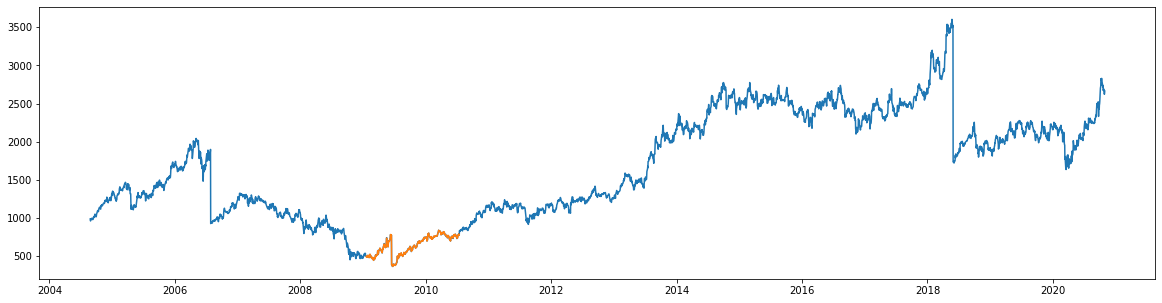

RMSE value - 2.266154337723999


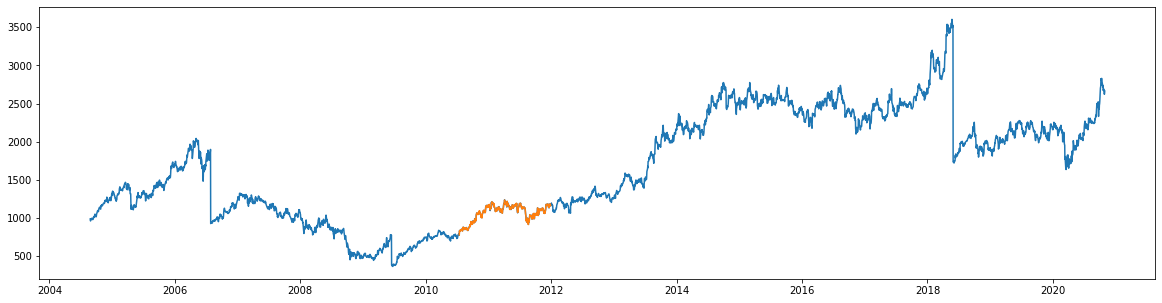

RMSE value - 2.939081572485942


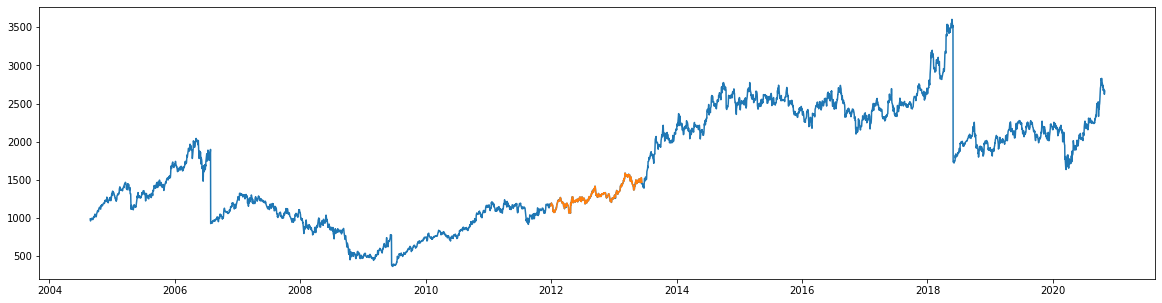

RMSE value - 3.229295147844565


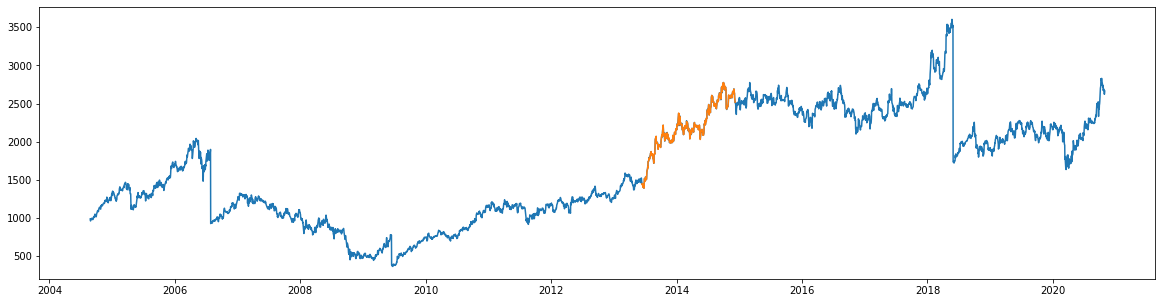

RMSE value - 4.472292392977635


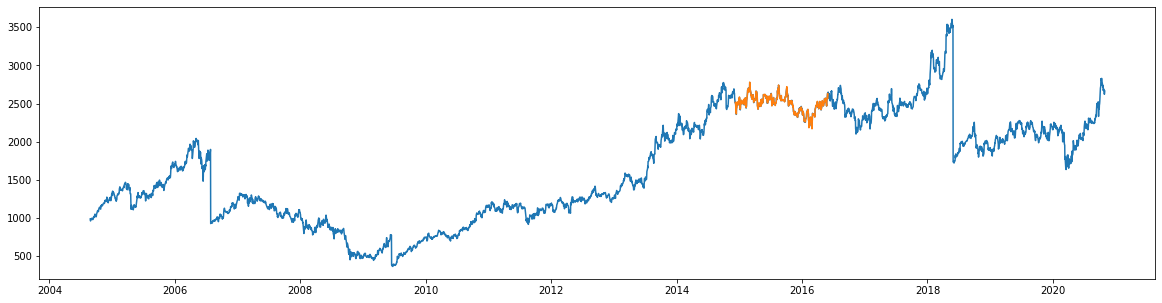

RMSE value - 4.98664185663661


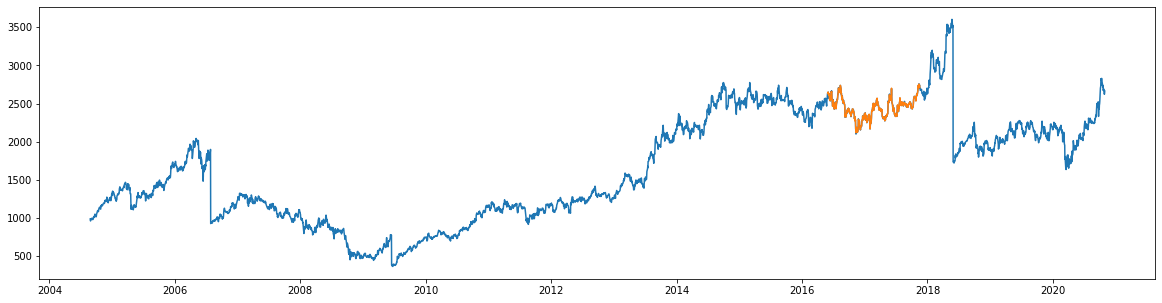

RMSE value - 4.5068919161957615


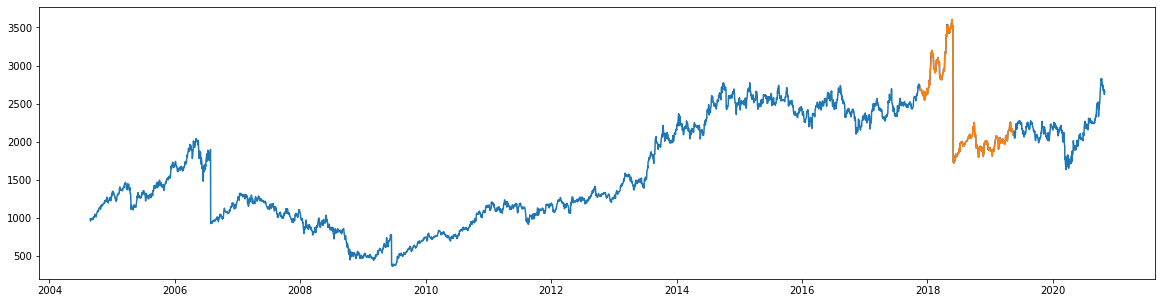

RMSE value - 4.641350038468369


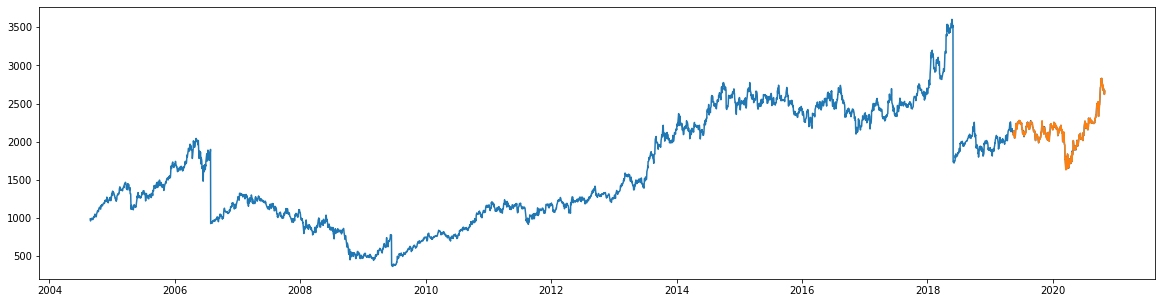

RMSE value - 5.057212806188009


In [59]:
rmses_lr =[]
for train_index,test_index in ts.split(X):
    X_train,X_test = X.values[train_index],X.values[test_index]
    y_train,y_test = y.values[train_index],y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = get_rmse(y_pred, y_test)
    rmses_lr.append(rmse)
    plt.figure(figsize=(20, 5))
    plt.plot(y)
    plt.plot(indx[test_index], y_pred)
    plt.show()
    print("RMSE value -", rmse)

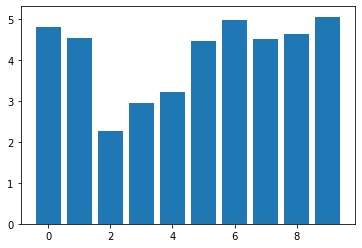

RMSE value -  4.145480824929592


In [60]:
rmse_lr_avg = np.mean(rmses_lr)
plt.bar(range(10), rmses_lr)
plt.show()
print("RMSE value - ", rmse_lr_avg)

# FbProphet for timeseries prediction

In [61]:
X_pr = pd.DataFrame(y.values, columns=['Close'])
X_pr['Date'] = y.index
X_train = X_pr[:cut]
X_test = X_pr[cut:]

In [62]:
model = Prophet()
model.fit(X_train[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
forecast = model.predict(X_test[["Date", "Close"]].rename(columns={"Date": "ds"}))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-02,2369.989340,2204.705190,2491.787581,2369.989340,2369.989340,-14.507613,-14.507613,-14.507613,-16.712452,-16.712452,-16.712452,2.204839,2.204839,2.204839,0.0,0.0,0.0,2355.481727
1,2017-08-03,2369.754422,2223.473025,2485.165921,2369.754422,2369.754422,-15.168294,-15.168294,-15.168294,-13.810326,-13.810326,-13.810326,-1.357967,-1.357967,-1.357967,0.0,0.0,0.0,2354.586128
2,2017-08-04,2369.519504,2211.881461,2475.542127,2369.519504,2369.519504,-22.788438,-22.788438,-22.788438,-17.901743,-17.901743,-17.901743,-4.886695,-4.886695,-4.886695,0.0,0.0,0.0,2346.731065
3,2017-08-07,2368.814749,2208.619750,2477.568024,2368.814749,2368.814749,-30.227361,-30.227361,-30.227361,-15.430897,-15.430897,-15.430897,-14.796463,-14.796463,-14.796463,0.0,0.0,0.0,2338.587388
4,2017-08-08,2368.579831,2206.737146,2462.882686,2368.579831,2368.579831,-33.511671,-33.511671,-33.511671,-15.778315,-15.778315,-15.778315,-17.733356,-17.733356,-17.733356,0.0,0.0,0.0,2335.068160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2020-10-26,2092.550936,-308.122316,4218.068797,-271.883976,4280.122689,-36.912656,-36.912656,-36.912656,-15.430897,-15.430897,-15.430897,-21.481759,-21.481759,-21.481759,0.0,0.0,0.0,2055.638279
800,2020-10-27,2092.316017,-376.483118,4237.682646,-276.823816,4284.944467,-38.355034,-38.355034,-38.355034,-15.778315,-15.778315,-15.778315,-22.576719,-22.576719,-22.576719,0.0,0.0,0.0,2053.960983
801,2020-10-28,2092.081099,-358.468404,4253.760783,-281.551397,4288.370635,-40.353480,-40.353480,-40.353480,-16.712452,-16.712452,-16.712452,-23.641028,-23.641028,-23.641028,0.0,0.0,0.0,2051.727619
802,2020-10-29,2091.846181,-385.342090,4240.355814,-285.367250,4290.429867,-38.477318,-38.477318,-38.477318,-13.810326,-13.810326,-13.810326,-24.666992,-24.666992,-24.666992,0.0,0.0,0.0,2053.368863


In [64]:
forecast.yhat

0      2355.481727
1      2354.586128
2      2346.731065
3      2338.587388
4      2335.068160
          ...     
799    2055.638279
800    2053.960983
801    2051.727619
802    2053.368863
803    2048.061218
Name: yhat, Length: 804, dtype: float64

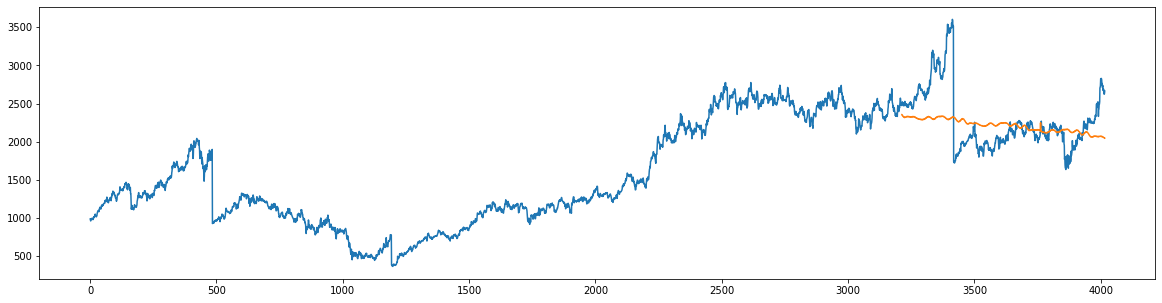

RMSE value -  382.16388313949


In [65]:
plt.figure(figsize=(20, 5))
plt.plot(X_pr['Close'])
plt.plot(X_test.index, forecast.yhat)
plt.show()
rmse_pr_fl = get_rmse(X_test["Close"], forecast.yhat)
print("RMSE value - ", rmse_pr_fl)

# ARIMA

In [66]:
X_train_ar = y[:cut]
X_test_ar = y[cut:]

In [67]:
arima_model = pmd.auto_arima(X_train_ar)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3213
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -15759.302
Date:                Fri, 04 Dec 2020   AIC                          31528.605
Time:                        22:14:43   BIC                          31558.978
Sample:                             0   HQIC                         31539.492
                               - 3213                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0180      0.082      0.219      0.826      -0.143       0.179
ar.L2          0.8109      0.071     11.450      0.000       0.672       0.950
ma.L1         -0.0214      0.071     -0.300      0.764      -0.161       0.118
ma.L2         -0.8555      0.064    -13.284      0.000      -0.982      -0.729
sigma2      1069.4229      4.904    218.054      0.000    1059.810    1079.035
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):           7882859.28
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -8.61
Prob(H) (two-sided):                  0.00   Kurtosis:                       245.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
y_pred_ar = arima_model.predict(X_test_ar.shape[0])
y_pred_ar

array([2500.29769026, 2499.33748887, 2498.22359958, 2497.42490868,
       2496.50726482, 2495.8430775 , 2495.08699268, 2494.5347843 ,
       2493.91172544, 2493.45271683, 2492.93920805, 2492.55774836,
       2492.13447106, 2491.81752106, 2491.46857481, 2491.20527459,
       2490.91757007, 2490.69887755, 2490.46163769, 2490.28002656,
       2490.08437662, 2489.93358392, 2489.77221453, 2489.64702997,
       2489.51392008, 2489.4100102 , 2489.30019924, 2489.21396068,
       2489.12336123, 2489.05179839, 2488.97704196, 2488.91766505,
       2488.85597528, 2488.8067153 , 2488.75580357, 2488.71494156,
       2488.67292104, 2488.6390291 , 2488.60434405, 2488.57623628,
       2488.54760377, 2488.5242954 , 2488.50065737, 2488.48133081,
       2488.46181453, 2488.44579106, 2488.42967663, 2488.41639292,
       2488.40308641, 2488.39207495, 2488.38108631, 2488.37195917,
       2488.36288405, 2488.35531937, 2488.34782407, 2488.34155486,
       2488.33536397, 2488.33016874, 2488.32505495, 2488.32075

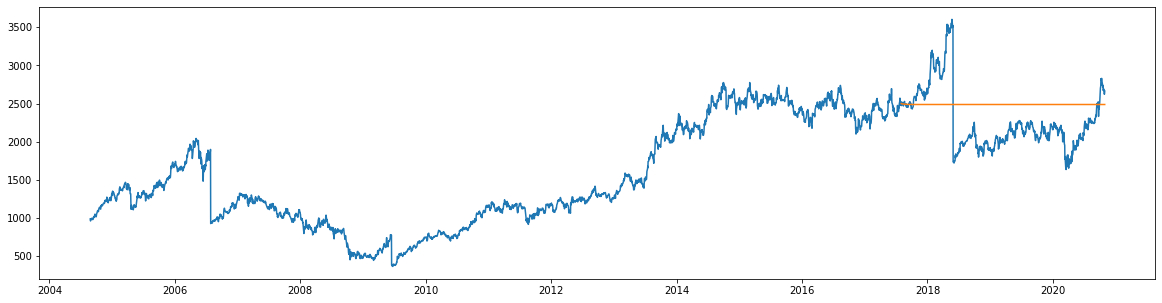

RMSE value -  454.77060590645914


In [69]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(X_test_ar.index, y_pred_ar)
plt.show()
rmse_arima_fl = get_rmse(X_test_ar, y_pred_ar)
print("RMSE value - ", rmse_arima_fl)

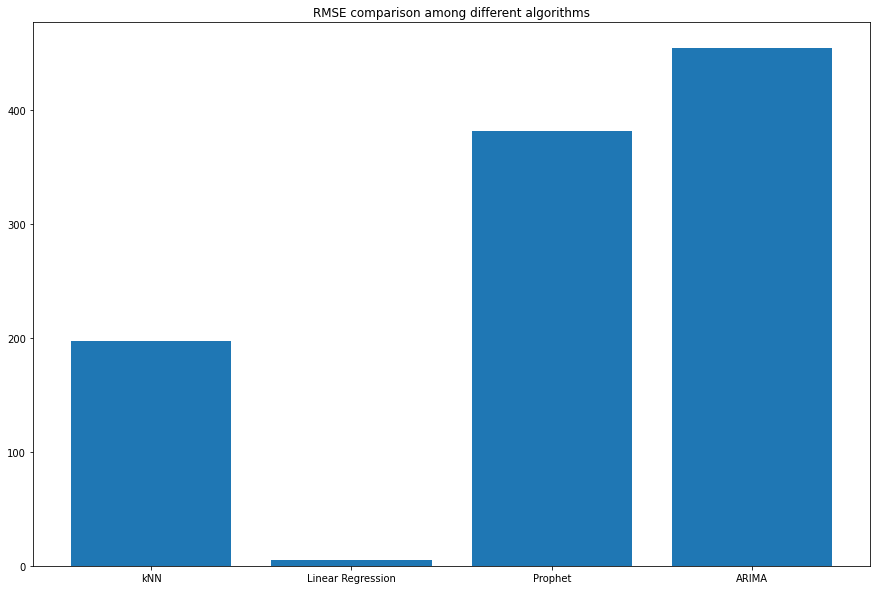

In [70]:
plt.figure(figsize=(15, 10))
plt.bar(["kNN", "Linear Regression", "Prophet", "ARIMA"], [rmse_knn_fl, rmse_lr_fl, rmse_pr_fl, rmse_arima_fl])
plt.title("RMSE comparison among different algorithms")
plt.show()